# 선형회귀

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [14]:
from sklearn.model_selection import train_test_split

# 훈련, 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state = 1225)

In [5]:
print(X_train.shape)
X_train

(42,)


array([24.6, 21. , 27.5, 22. , 40. , 25.6, 36. , 23.5, 19.6, 39. , 23. ,
       28. , 30. , 22. , 22.5, 21.3, 35. , 27.3, 28.7, 40. , 44. , 39. ,
       22.7, 39. , 21. , 26.5, 42. , 43. , 32.8, 22.5, 16.2, 18.7,  8.4,
       27.5, 22. , 25. , 15. , 40. , 34.5, 37. , 27.5, 24. ])

In [6]:
print(X_test.shape)
X_test

(14,)


array([22. , 22. , 13.7, 36.5, 19. , 21. , 20. , 43.5, 17.4, 43. , 40. ,
       18. , 37. , 24. ])

In [7]:
# 위의 X_train, X_test 의 크기를 변경해주기

In [19]:
X_train = X_train.reshape(-1,1)
X_test= X_test.reshape(-1,1)

In [20]:
from sklearn.neighbors import KNeighborsRegressor 
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [21]:
print(knr.predict(X_test))

[ 123.33333333  123.33333333   56.5         746.66666667   96.
  123.33333333  108.33333333 1066.66666667   71.5        1066.66666667
  921.66666667   71.5         683.33333333  167.66666667]


In [22]:
print(knr.predict([[50]]))
# 실제 값보다 훠

[1066.66666667]


In [24]:
print(knr.predict(X_test))
print(y_test)

# 실제값과 비교하였을 때 그 경향성은 비슷하지만 실제 숫자와 차이를 많이 보이는 경우도 있다는 것을 확인할 수 있다

[ 123.33333333  123.33333333   56.5         746.66666667   96.
  123.33333333  108.33333333 1066.66666667   71.5        1066.66666667
  921.66666667   71.5         683.33333333  167.66666667]
[ 135.  110.   32.  685.   80.  110.   85. 1000.   70. 1000.  820.  100.
  690.  225.]


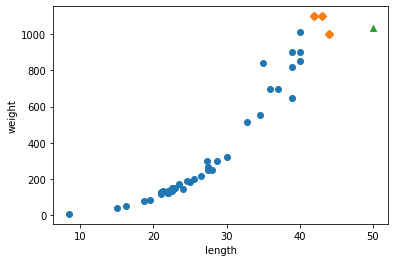

In [25]:
import matplotlib.pyplot as plt 
distances, indexes = knr.kneighbors([[50]])
plt.scatter(X_train, y_train)

plt.scatter(X_train[indexes], y_train[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 그림속 맞추고자 하는 세모의 값과 다른 마름모값들의 평균을 확인할 수 있다
# KNN의 경우, 주어진 학습 데이터셋의 평균값으로 target 을 예측하기 때문에,
# 모델이 학습하지 않은 새로운 값을 내보내야 하는 아래와 같은 상황이 발생할 때는
# 올바른 답을 내지 못할 가능성이 큼

In [26]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression() 

lr.fit(X_train, y_train)

print(lr.predict([[50]]))

[1211.22118519]


In [27]:
print(lr.coef_, lr.intercept_) # 회귀계수와 절편은 이런식으로 확인
# 모델 기반 학습 : 최적의 모델 파라미터를 찾고자 하는 것 
# 사례 기반 학습 : k-최근접 이웃에는 모델 파라미터가 없고, 훈련 세트를 저장하는 것이 훈련의 전부였음

[37.81869717] -679.7136731885207


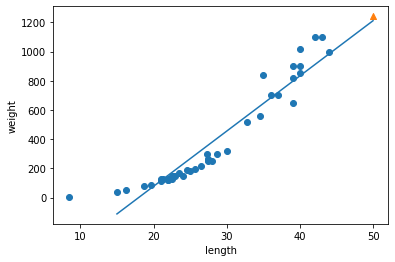

In [28]:
plt.scatter(X_train, y_train)
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#  나름 잘 예측한 것 처럼 보이(?) 기 때문에 해당 모델의 결정계수(=설명력) 도 확인하고자 함

In [ ]:
print(lr.score(X_train, y_train))